In [1]:
%matplotlib inline
from helpers import extract_images, load_data
import matplotlib.pyplot as plt
import numpy as np
import cv2

> Extracting images from video
done


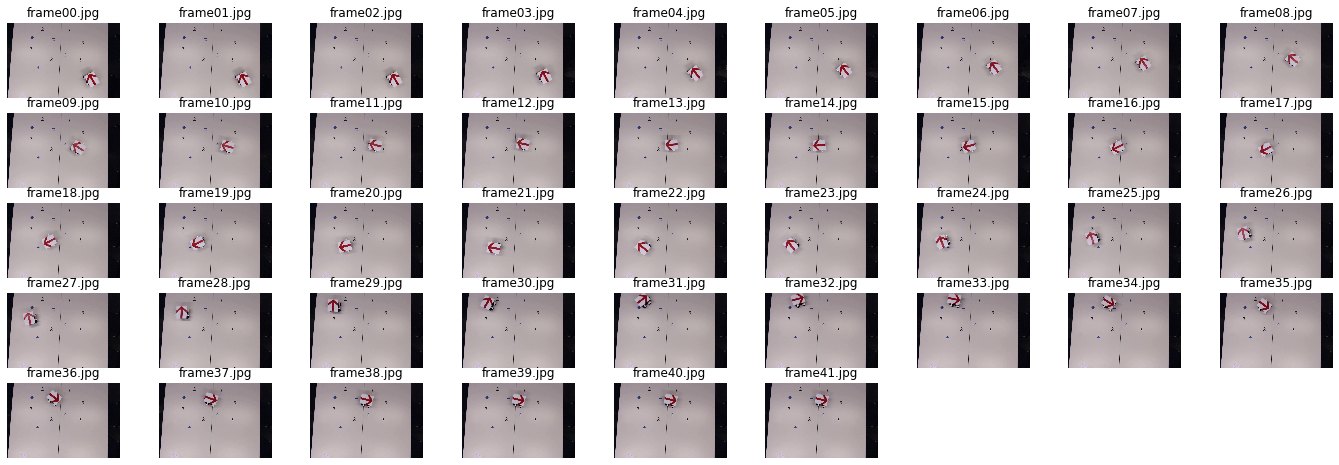

In [2]:
# extract images from video
extract_images()

# load data from extracted images
images, images_names = load_data()

# plot images
fig, axes = plt.subplots(5, int(len(images)/5)+1, figsize=(24, 8))
for ax, im, nm in zip(axes.ravel(), images, images_names):
    ax.imshow(im)
    ax.axis('off')
    ax.set_title(nm)   
for ax in axes.ravel()[len(images):]:
    fig.delaxes(ax)

[[10 10 10 ... 16 17 17]
 [10 11 11 ... 15 16 16]
 [11 11 11 ... 15 16 16]
 ...
 [20 22 23 ...  9  9  9]
 [20 18 25 ...  9  9  9]
 [20 15 26 ...  9  9  9]]


7

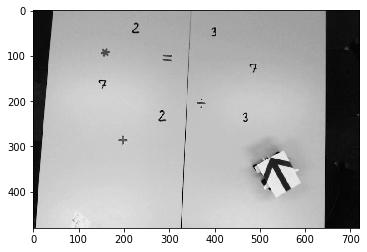

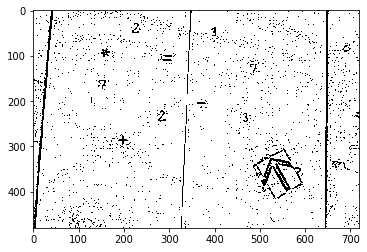

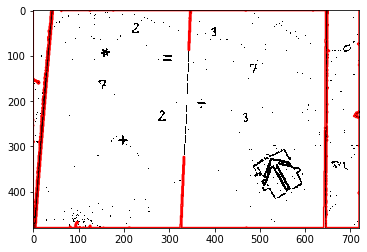

In [3]:
from skimage.filters import median
grey = cv2.cvtColor(images[0].copy(), cv2.COLOR_BGR2GRAY)
print(grey)
plt.figure()
plt.imshow(grey,cmap ='gray')
thresh= cv2.adaptiveThreshold(grey.copy(),255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)
plt.figure()
plt.imshow(thresh,cmap="gray")
thresh = median (thresh)
plt.figure()
plt.imshow(thresh,cmap = "gray")
contours, _ = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
plt.plot(contours[0][:,0,0],contours[0][:,0,1], color = 'red')
plt.plot(contours[1][:,0,0],contours[1][:,0,1], color = 'red')
plt.plot(contours[2][:,0,0],contours[2][:,0,1], color = 'red')
plt.plot(contours[3][:,0,0],contours[3][:,0,1], color = 'red')
plt.plot(contours[4][:,0,0],contours[4][:,0,1], color = 'red')
plt.plot(contours[5][:,0,0],contours[5][:,0,1], color = 'red')
plt.plot(contours[6][:,0,0],contours[6][:,0,1], color = 'red')

len(contours)

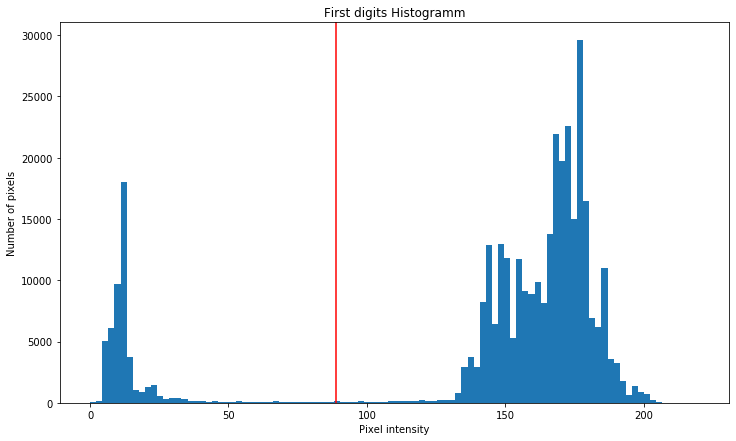

[[10 10 10 ... 16 17 17]
 [10 11 11 ... 15 16 16]
 [11 11 11 ... 15 16 16]
 ...
 [20 22 23 ...  9  9  9]
 [20 18 25 ...  9  9  9]
 [20 15 26 ...  9  9  9]]


35

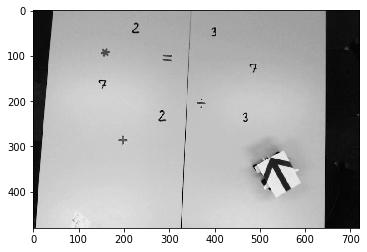

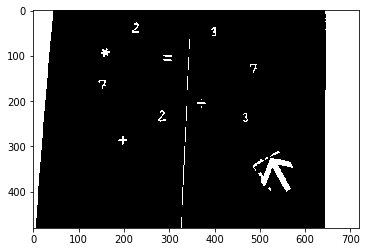

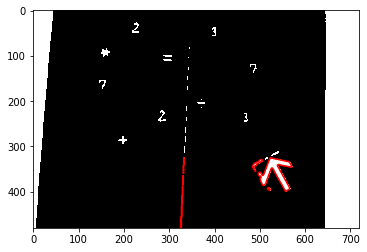

In [92]:
from skimage.filters import threshold_otsu, median
grey = cv2.cvtColor(images[0].copy(), cv2.COLOR_BGR2GRAY)

# Binarization based on Otsu threshold
thresh_zeros = threshold_otsu(grey)

# Display histogram
plt.figure(figsize=(12, 7))
plt.hist(grey.ravel(), bins=100)
plt.axvline(thresh_zeros, color='r')
plt.xlabel('Pixel intensity')
plt.ylabel('Number of pixels')
plt.title('First digits Histogramm')

plt.show()

plt.show()
print(grey)
plt.figure()
plt.imshow(grey,cmap ='gray')
ret, thresh = cv2.threshold(grey.copy(), 110, 255, cv2.THRESH_BINARY_INV)
plt.figure()
plt.imshow(thresh,cmap="gray")
thresh = median (thresh)
plt.figure()
plt.imshow(thresh,cmap = "gray")
contours, _ = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
plt.plot(contours[0][:,0,0],contours[0][:,0,1], color = 'red')
plt.plot(contours[1][:,0,0],contours[1][:,0,1], color = 'red')
plt.plot(contours[2][:,0,0],contours[2][:,0,1], color = 'red')
plt.plot(contours[3][:,0,0],contours[3][:,0,1], color = 'red')
plt.plot(contours[4][:,0,0],contours[4][:,0,1], color = 'red')
plt.plot(contours[5][:,0,0],contours[5][:,0,1], color = 'red')
plt.plot(contours[6][:,0,0],contours[6][:,0,1], color = 'red')

len(contours)

75.0
[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]



----------------Contoured Image--------------------


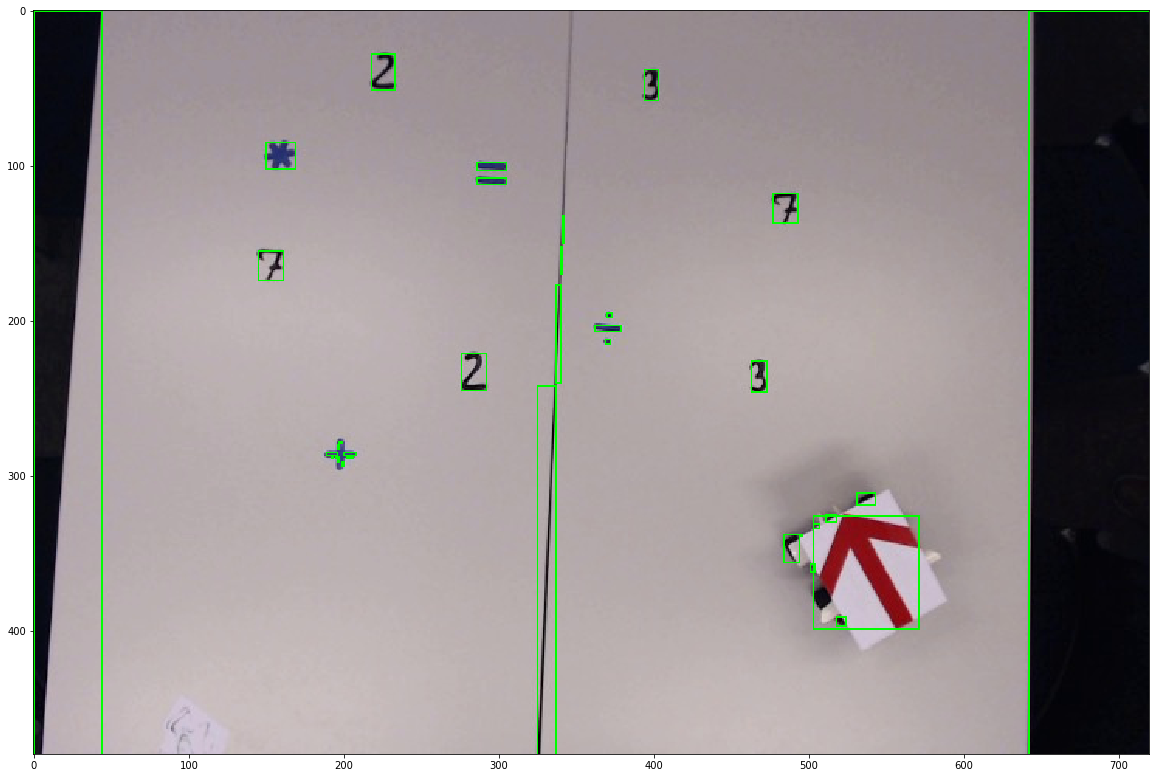

In [3]:
grey = cv2.cvtColor(images[0].copy(), cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(grey.copy(), 75, 255, cv2.THRESH_BINARY_INV)
print(ret)
print(thresh)
contours, _ = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
preprocessed_digits = []
for c in contours:
    x,y,w,h = cv2.boundingRect(c)
    
    # Creating a rectangle around the digit in the original image (for displaying the digits fetched via contours)
    cv2.rectangle(images[0], (x,y), (x+w, y+h), color=(0, 255, 0), thickness=1)
    
    # Cropping out the digit from the image corresponding to the current contours in the for loop
    digit = thresh[y:y+h, x:x+w]
    
    # Resizing that digit to (18, 18)
    resized_digit = cv2.resize(digit, (18,18))
    
    # Padding the digit with 5 pixels of black color (zeros) in each side to finally produce the image of (28, 28)
    padded_digit = np.pad(resized_digit, ((5,5),(5,5)), "constant", constant_values=0)
    
    # Adding the preprocessed digit to the list of preprocessed digits
    preprocessed_digits.append(padded_digit)
print("\n\n\n----------------Contoured Image--------------------")
plt.figure(figsize=(20,16))
plt.imshow(images[0], cmap="gray")
plt.show()
    
inp = np.array(preprocessed_digits)

#### Sliding window

In [3]:
# import the necessary packages
import imutils
import time
def pyramid(image, scale=1.5, minSize=(15, 15)):
	# yield the original image
	yield image
	# keep looping over the pyramid
	while True:
		# compute the new dimensions of the image and resize it
		w = int(image.shape[1] / scale)
		image = imutils.resize(image, width=w)
		# if the resized image does not meet the supplied minimum
		# size, then stop constructing the pyramid
		if image.shape[0] < minSize[1] or image.shape[1] < minSize[0]:
			break
		# yield the next image in the pyramid
		yield image
def sliding_window(image, stepSize, windowSize):
	# slide a window across the image
	for y in range(0, image.shape[0], stepSize):
		for x in range(0, image.shape[1], stepSize):
			# yield the current window
			yield (x, y, image[y:y + windowSize[1], x:x + windowSize[0]])

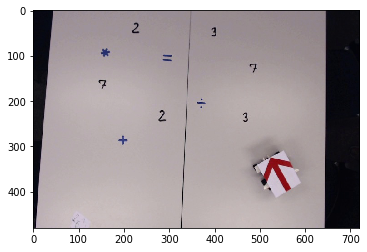

In [4]:
plt.imshow(images[0])

In [5]:
# load the image and define the window width and height
image = cv2.imread("images/frame00.jpg")
print(image.shape)
(winW, winH) = (35, 35)
# loop over the image pyramid
for resized in pyramid(image, scale=1.5):
	# loop over the sliding window for each layer of the pyramid
	for (x, y, window) in sliding_window(resized, stepSize=32, windowSize=(winW, winH)):
		# if the window does not meet our desired window size, ignore it
		if window.shape[0] != winH or window.shape[1] != winW:
			continue
		# THIS IS WHERE YOU WOULD PROCESS YOUR WINDOW, SUCH AS APPLYING A
		# MACHINE LEARNING CLASSIFIER TO CLASSIFY THE CONTENTS OF THE
		# WINDOW
		# since we do not have a classifier, we'll just draw the window
		clone = resized.copy()
		cv2.rectangle(clone, (x, y), (x + winW, y + winH), (0, 255, 0), 2)
		cv2.imshow("Window", clone)
		cv2.waitKey(1)
		time.sleep(0.025)

(480, 720, 3)
